In [ ]:
# === PHASE 3: MONTE CARLO SIMULATION - PROJECTING FUTURE STOCK PATHS ===
# 🧭 Why we're doing this:
# This phase helps us explore potential future movements of TSLA stock using historical volatility.
# It allows us to visualize uncertainty, model market risk, and estimate optimistic/pessimistic outcomes.
# This sets the stage for generating insightful AI-based summaries in the next phase.
# 🎲 Goal: Simulate potential future TSLA price paths using historical volatility
# 🧠 Skills Practiced: Time series returns, volatility modeling, stochastic simulation
# 🎯 Learning Goals: Understand Monte Carlo modeling and visualize risk scenarios

# === 1. IMPORT LIBRARIES ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === 2. LOAD CLEANED STOCK DATA ===
# 📦 Load previously saved stock data with 'close' prices
file_path = "TSLA_stock_data.csv"
df = pd.read_csv(file_path, parse_dates=['date'], index_col='date')

# ✅ Expected Result:
# A Pandas DataFrame with a 'close' column indexed by date

In [28]:
# === 3. CALCULATE DAILY RETURNS ===
# 📈 Return = today's close / yesterday's close - 1
# This gives us the historical distribution of daily % changes
df['daily_return'] = df['close'].pct_change()
df = df.dropna()  # Drop the first row with NaN from pct_change()


# ✅ Expected Result:
# A new column 'daily_return' added, containing the % change of stock price each day

In [29]:
# === 4. DEFINE SIMULATION PARAMETERS ===
# We'll base the simulation on historical average return and standard deviation (volatility)
start_price = df['close'].iloc[-1]           # 🟢 Most recent closing price
num_simulations = 1000                       # 🎲 Number of simulation runs
num_days = 30                                # 📆 Number of future days to simulate
mean_return = df['daily_return'].mean()      # 📊 Historical daily mean return
volatility = df['daily_return'].std()        # 📈 Historical daily volatility (standard deviation)

# ✅ Expected Result:
# These variables will define the randomness in our future simulations

In [30]:
# === 5. RUN MONTE CARLO SIMULATION ===
# Create an empty matrix to hold simulated prices
simulations = np.zeros((num_simulations, num_days))

# Run each simulation
for i in range(num_simulations):
    price = start_price  # Reset to today's price for each simulation
    for d in range(num_days):
        # 🔁 Apply a random daily return sampled from normal distribution
        shock = np.random.normal(loc=mean_return, scale=volatility)
        price = price * (1 + shock)
        simulations[i, d] = price  # Save that day's price

# ✅ Expected Result:
# A 2D numpy array (1000 x 30) with simulated price paths for 30 future days

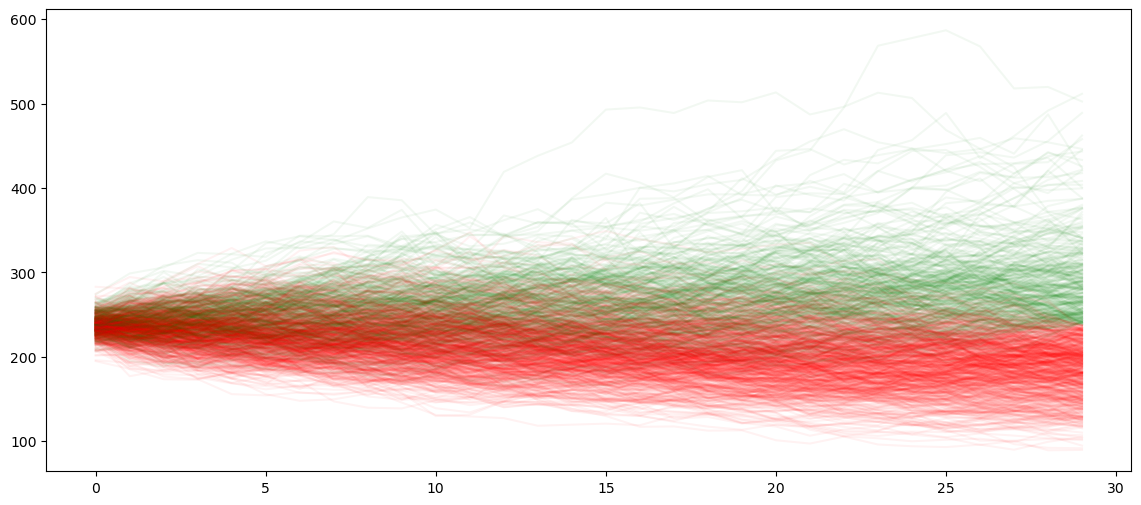

In [31]:
# === 6. PLOT THE SIMULATION RESULTS ===
# We'll also calculate percentile bands and summarize final price projections
plt.figure(figsize=(14, 6))
# Highlight best and worst scenarios
# 🟩 Green = simulation ends ABOVE current price (positive trend)
# 🟥 Red   = simulation ends BELOW current price (negative trend)
# 🎯 This helps visually separate optimistic vs. pessimistic scenarios
for i in range(simulations.shape[0]):
    color = 'green' if simulations[i, -1] > start_price else 'red'
    plt.plot(simulations[i], alpha=0.05, color=color)  # Each line is one simulated path

📈 Summary of Final Simulated Prices (Day 30):
5th Percentile (Pessimistic): $134.06
Median (Most Likely): $209.05
95th Percentile (Optimistic): $336.86


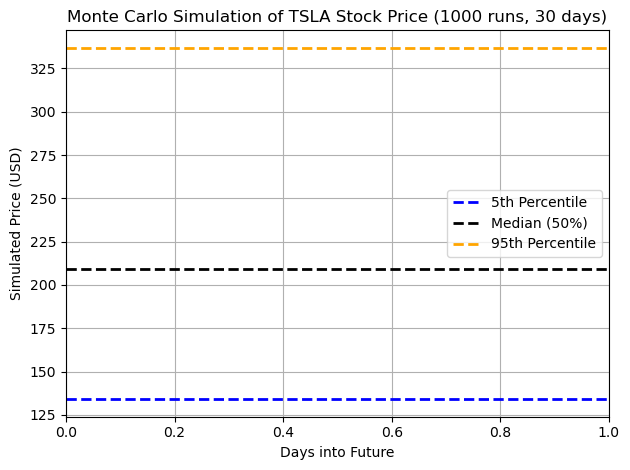

In [32]:
# === 7. SUMMARY STATISTICS AND CONFIDENCE INTERVALS ===
# 📊 Analyze the final prices after the last simulated day
final_prices = simulations[:, -1]  # Get last-day prices from each simulation

# Compute percentile boundaries
p5 = np.percentile(final_prices, 5)
p50 = np.percentile(final_prices, 50)
p95 = np.percentile(final_prices, 95)

# Overlay Percentile Bands on Plot
# 🔵 Blue line = 5th percentile (pessimistic outcome)
# ⚫ Black line = 50th percentile (median outcome)
# 🟠 Orange line = 95th percentile (optimistic outcome)
plt.axhline(y=p5, color='blue', linestyle='--', linewidth=2, label='5th Percentile')
plt.axhline(y=p50, color='black', linestyle='--', linewidth=2, label='Median (50%)')
plt.axhline(y=p95, color='orange', linestyle='--', linewidth=2, label='95th Percentile')
plt.legend()
plt.title(f"Monte Carlo Simulation of TSLA Stock Price ({num_simulations} runs, {num_days} days)")
plt.xlabel("Days into Future")
plt.ylabel("Simulated Price (USD)")
plt.grid(True)
plt.tight_layout()

# Print summary
print("📈 Summary of Final Simulated Prices (Day 30):")
# 🧾 Shows the spread of simulated outcomes to understand risk and opportunity
print(f"5th Percentile (Pessimistic): ${p5:.2f}")
print(f"Median (Most Likely): ${p50:.2f}")
print(f"95th Percentile (Optimistic): ${p95:.2f}")

# ✅ Expected Result:
# A plot of 1,000 simulated TSLA stock price paths — some going up, some down, most clustered in the middle
# 📉 Helps visualize risk, volatility, and price projection range based on history

# 🧠 What You Just Achieved (Reinforced):
# ✅ Calculated stock returns and volatility from real data
# ✅ Applied Monte Carlo Simulation to model uncertainty
# ✅ Visualized thousands of possible futures based on historical trends
# ✅ Built financial risk awareness through data
